<h1>Exhaust modeling with PyPlume </h1> 
<h3>Anthony Walker</h3>
<div class="row">
  <div class="column">
    <img style="float: left; width: 50%; padding: 5px" src="https://communications.oregonstate.edu/sites/communications.oregonstate.edu/files/osu-primarylogo-2-compressor.jpg">
  </div>
  <div class="column">
    <img style="float: right; padding: 5px" src="https://niemeyer-research-group.github.io/assets/themes/lab/images/logo/lab-logo.svg">
  </div>
</div>


# Background & Motivation

+ **Jacobian Preconditioning**
+ **Atmospheric Chemistry**

<img style="float: left; padding: 1px" src="https://docs.google.com/drawings/d/e/2PACX-1vQXTWGDqDBCHU0wRsgG4QKfFBGwy-_Oj-R_chnHuKbOq9cCRg8Y4wh4L4J8WNvwXsFnvaEgLNvp1EBB/pub?w=480&h=360">

# Design

+ **mechanisms**
+ **model**
+ **output**
+ **figures**
+ **statistics**

<img style="float: left; padding: 1px;  width: 80%;
  height: auto" src="https://docs.google.com/drawings/d/e/2PACX-1vR3WNdtqP-XrTlt2AzNjb0qXGGVhuw_hbf4pLCnDHrq7-beNKYHCRTqri56t5TiE5LrBjiyP0PtiJQ-/pub?w=738&h=178">




# Theory

+ **Cantera Reactor Network**
+ **Exhaust Models**
+ **Less Well Mixed**

<img style="float: right; padding: 5px" src="https://docs.google.com/drawings/d/e/2PACX-1vQjNOcn46UpOd9TokKdJO9kFOwqvHtagDwb1Mq05iR0QUzjVnW41DEZQ_YD6RL4AGChMI5Kgl3Kp3vx/pub?w=1203&h=513">





# Installation

```python
conda install -c anthony-walker pyplume
```

```python
pip install pyplume
```

# Testing

The plan is to have a test function of each module. I have currently implemented some of them.

In [7]:
!rm simple.hdf5 #remove hdf5 file
!pyplume.mech -t #commandline test mechanisms


============================= test session starts ==============================
platform linux -- Python 3.6.10, pytest-5.4.2, py-1.8.1, pluggy-0.13.1 -- /home/sokato/miniconda3/envs/presentation/bin/python
cachedir: .pytest_cache
rootdir: /home/sokato
collected 4 items                                                              

../../../../miniconda3/envs/presentation/lib/python3.6/site-packages/pyplume/tests/testMechs.py::test_mechFileAdd_exit PASSED [ 25%]
../../../../miniconda3/envs/presentation/lib/python3.6/site-packages/pyplume/tests/testMechs.py::test_mechFileAdd PASSED [ 50%]
../../../../miniconda3/envs/presentation/lib/python3.6/site-packages/pyplume/tests/testMechs.py::test_mechFileDelete PASSED [ 75%]
../../../../miniconda3/envs/presentation/lib/python3.6/site-packages/pyplume/tests/testMechs.py::test_mechFileRestore PASSED [100%]

============================== 4 passed in 0.02s ===============================
============================= test session starts =========

In [29]:
!pyplume.model simple -t #commandline test model

============================= test session starts ==============================
platform linux -- Python 3.6.10, pytest-5.4.2, py-1.8.1, pluggy-0.13.1 -- /home/sokato/miniconda3/envs/presentation/bin/python
cachedir: .pytest_cache
rootdir: /home/sokato
collected 5 items                                                              

../../../../miniconda3/envs/presentation/lib/python3.6/site-packages/pyplume/tests/testModel.py::test_linearExpansionModel PASSED [ 20%]
../../../../miniconda3/envs/presentation/lib/python3.6/site-packages/pyplume/tests/testModel.py::test_gridModel PASSED [ 40%]
../../../../miniconda3/envs/presentation/lib/python3.6/site-packages/pyplume/tests/testModel.py::test_simpleModel PASSED [ 60%]
../../../../miniconda3/envs/presentation/lib/python3.6/site-packages/pyplume/tests/testModel.py::test_connectReactors PASSED [ 80%]
../../../../miniconda3/envs/presentation/lib/python3.6/site-packages/pyplume/tests/testModel.py::test_createReactors PASSED [100%]

==========

In [36]:
import sys
import pyplume
import numpy as np

#Install package
!conda install --yes --prefix {sys.prefix} -c anthony-walker pyplume

# Mechanism management
cti = 'test.cti'
pyplume.mech.mechFileAdd(cti) #Add mechanism file
pyplume.mech.mechFileList() #list mechanism files
#pyplume.tests.testMechs.runTests() #Run tests for mech management


Solving environment: done

# All requested packages already installed.


Checking test.cti exists and is a file...

Adding test.cti to mechanisms...

done.


Listing mechanism files.

	test.cti
	gri30.cti
	h2o2.cti
done.



In [37]:

!rm simple.hdf5 #remove hdf5 file
#Create model
plumeModel = pyplume.model.PlumeModel.simpleModel()
print(pyplume.model.PlumeModel.linearExpansionModel.__doc__)
#Build Network
plumeModel.buildNetwork()


        Linear Expansion Model:
        Use this function to generate an instance with linear expansion connects method. It takes all the parameters
        that the class does except connects and replaces connects with n parameter.

        Parameters:
            n - number of reactors using linear expansion. e.g. at level 1 there is one reactor
                at level two there are two and so on. n must result in an integer number of steps
                based on the formula:steps=(-1+np.sqrt(1+8*n))/2

        Network:
        [fuel res]->[combustor]->[ex1]->[ex2]->[ex4]->[exRes]
                                      ->[ex3]->[ex5]->[exRes]
                                             ->[ex6]->[exRes]
        [farfield]->[ex1,ex2,ex3,ex4,ex6]

        Notes:
        The farfield is connected as an inlet for each exterior reactor if you were to draw them as 2D blocks.
        


In [38]:
print(plumeModel)

PyPlume Network Model Summary:
fuel: T: 300.00 K, V: 1.00 m^3, mass: 0.08 kg
atmosphere: T: 300.00 K, V: 1.00 m^3, mass: 1.18 kg
combustor: T: 300.00 K, V: 1.00 m^3, mass: 0.08 kg
exhaust0: T: 300.00 K, V: 1.00 m^3, mass: 0.08 kg
exhaust: T: 300.00 K, V: 1.00 m^3, mass: 1.18 kg


In [39]:
#Integrate model over time
for t in np.arange(0,1,0.1):
    plumeModel(t)
#Advance model to steady state
ss = plumeModel.steadyState()
plumeModel.ptype = False #Set for dense printing
print(plumeModel)

PyPlume Network Model Summary:
fuel: T: 300.00 K, V: 1.00 m^3, mass: 0.08 kg
atmosphere: T: 300.00 K, V: 1.00 m^3, mass: 1.18 kg
combustor: T: 300.00 K, V: 1.00 m^3, mass: 0.08 kg
exhaust0: T: 300.00 K, V: 1.01 m^3, mass: 0.09 kg
exhaust: T: 300.00 K, V: 1.00 m^3, mass: 1.18 kg
Reactor Network Mass Fractions:
combustor
 mass: 8.19e-02,  enthalpy: 2.17e+03,  H2: 1.00e+00,  H: -2.10e-33,  O: 3.72e-46,  O2: -4.20e-34,  OH: 5.46e-49,  H2O: 3.58e-34,  HO2: 9.51e-37,  H2O2: 1.84e-45,  C: -8.00e-37,  CH: -1.36e-52,  CH2: -5.94e-38,  CH2(S): -3.05e-62,  CH3: 7.65e-34,  CH4: 1.13e-33,  CO: 4.38e-54,  CO2: 1.22e-55,  HCO: 4.04e-55,  CH2O: 8.51e-54,  CH2OH: 7.78e-60,  CH3O: -3.42e-62,  CH3OH: 6.18e-55,  C2H: -1.90e-73,  C2H2: 3.19e-54,  C2H3: -9.86e-74,  C2H4: 1.51e-56,  C2H5: -3.45e-55,  C2H6: -4.03e-47,  HCCO: 2.50e-92,  CH2CO: -2.11e-78,  HCCOH: 1.19e-88,  N: 0.00e+00,  NH: 0.00e+00,  NH2: 0.00e+00,  NH3: 0.00e+00,  NNH: 0.00e+00,  NO: 0.00e+00,  NO2: 0.00e+00,  N2O: 0.00e+00,  HNO: 0.00e+00, 

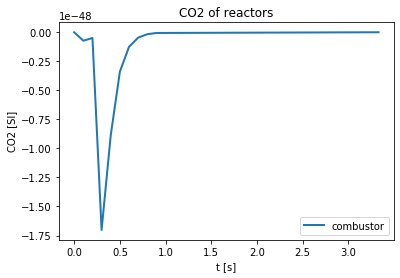

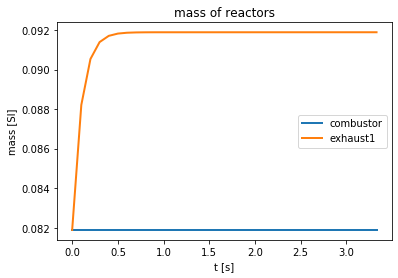

In [34]:
fgk = pyplume.figures.figureGenerationKit("simple.hdf5",save=False,show=True)
# fgk.plotProperty(['CO2','mass'])
fgk.plotProperty(['CO2',],reactors=[0,])
fgk.plotProperty(['mass',])

# Command-line interface

```shell
pyplume.mech -a test.cti
pyplume.model simple
pyplume.figures simple.hdf5
```

In [1]:
!rm simple.hdf5
!pyplume.mech -a test.cti
!pyplume.model simple --verbose
!pyplume.figures simple.hdf5 -d -w -p 'CO2' 'mass'
!ls


Checking test.cti exists and is a file...

Adding test.cti to mechanisms...

done.

Creating simple model and building network.
Advancing to time: 0.000.
Advancing to time: 0.100.
Advancing to time: 0.200.
Advancing to time: 0.300.
Advancing to time: 0.400.
Advancing to time: 0.500.
Advancing to time: 0.600.
Advancing to time: 0.700.
Advancing to time: 0.800.
Advancing to time: 0.900.
Advancing to time: 1.000.
Figure(640x480)
Figure(640x480)
 CO2.pdf			   pyplume-presentation.ipynb
 mass.pdf			   pyplume-presentation.slides.html
'ME 599 presentation rubric.pdf'   simple.hdf5
 nohup.out			   test.cti


# Future Work

# Questions?